In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import folium
from folium.plugins import HeatMap
import plotly.express as px

### Dataset Descrption :    

**hotel: Type of hotel (Categorical)**
1. is_canceled: Whether the booking was canceled or not (Binary)

2. lead_time: Number of days between booking date and arrival date (Numeric)

3. arrival_date_year: The year of the arrival date (Numeric)

4. arrival_date_month: The month of the arrival date (Categorical)

5. arrival_date_week_number: The week number of the arrival date (Numeric)

6. arrival_date_day_of_month: The day of the month of the arrival date (Numeric)

7. stays_in_weekend_nights: Number of weekend nights stayed or booked to stay at the hotel (Numeric)

8. stays_in_week_nights: Number of week nights stayed or booked to stay at the hotel (Numeric)

9. adults, children, babies: Number of guests categorized by age groups
*   adults = Number of adults
*   children = Number of children
*   babies = Number infants

**Booking Details:**

1. meal: Type(s) food option(s) included in booking package (Categorical)
2. country & market_segment & distribution_channel columns provide demographic and customer classification information.
3. is_repeated_guest column specifies whether a guest is a repeated visitor or not.
4. previous_cancellations column indicates how many previous bookings were canceled by a guest.
5. previous_bookings_not_canceled shows how many previous bookings were not canceled by a guest.

**Accommodation Details:**

1. reserved_room_type column indicates which type room was originally reserved for each booking.
2. assigned_room_type mentions which type room was finally assigned for each booking.
3. booking_changes: Number of changes made to the booking before arrival.
4. deposit_type: Type of deposit made for the booking (Categorical).
5. agent & company columns provide relevant information about the travel agency and/or company involved in making the reservation.

**Additional Information:**

1. days_in_waiting_list: Number of days the booking was on a waiting list before it was confirmed or canceled.
2. customer_type provides information on types of customers (Categorical)
3. adr: Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights (Numeric)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/2nd Project (Hotel)/train.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [5]:
# checking the missing value from the columns
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


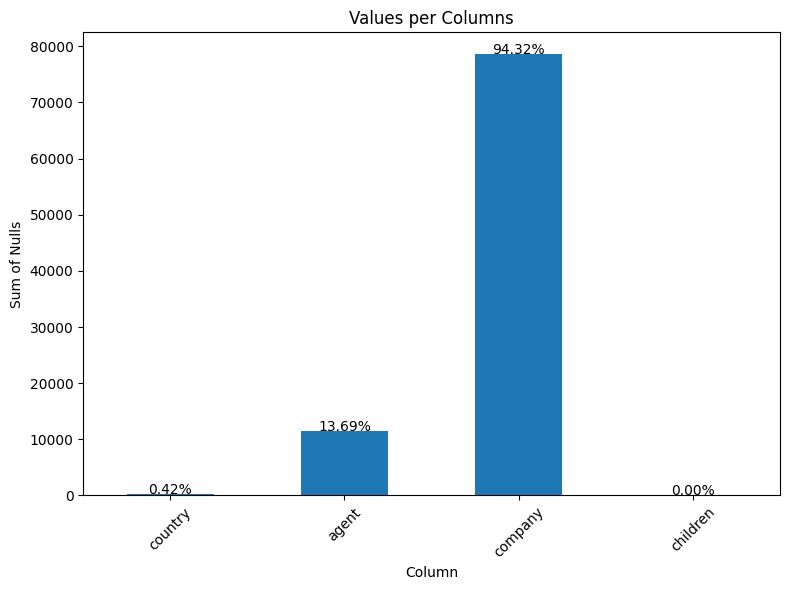

In [6]:
# Visualize the missing value
most_missing = ['country', 'agent', 'company', 'children']
null_counts = df[most_missing].isnull().sum()

total_data = len(df[most_missing])
# null_percentages = (null_counts / total_data) * 100

plt.figure(figsize=(8, 6))
ax = null_counts.plot(kind='bar')
plt.title('Values per Columns')
plt.xlabel('Column')
plt.ylabel('Sum of Nulls')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f"{height / total_data * 100:.2f}%", ha="center")

plt.tight_layout()
plt.show()

Missing value yang terdapat pada kolom agent dan company dapat diasumsikan sebagai customer yang datang atau melakukan booking hotel tidak menggunakan perantara agent ataupun company, jadi mereka melakukan booking hotel secara individu ataupun lansung ke pihak hotel, sedangkan untuk children yang ada missing nya, bisa diasumsikan sebagai 0, dan ada sedikit missing informasi dari kolom country yang akan kita drop.

In [7]:
# drop missing value dari kolom country
df.dropna(subset=['country'], inplace=True)

In [8]:
# mengisi Missing Value dengan nilai 0
df.fillna(0, inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82947 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82947 non-null  object 
 1   is_canceled                     82947 non-null  int64  
 2   lead_time                       82947 non-null  int64  
 3   arrival_date_year               82947 non-null  int64  
 4   arrival_date_month              82947 non-null  object 
 5   arrival_date_week_number        82947 non-null  int64  
 6   arrival_date_day_of_month       82947 non-null  int64  
 7   stays_in_weekend_nights         82947 non-null  int64  
 8   stays_in_week_nights            82947 non-null  int64  
 9   adults                          82947 non-null  int64  
 10  children                        82947 non-null  float64
 11  babies                          82947 non-null  int64  
 12  meal                            

In [11]:
condition = (df.adults == 0) & (df.children == 0) & (df.babies == 0)

df[condition]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,0.0,0,SC,BRA,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient,97.40,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,0.0,0.0,0,Transient,28.00,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,K,0,No Deposit,85.0,0.0,0,Transient,0.00,0,0,Check-Out,2019-02-27,1992
2036,Baton Rouge Acadian Centre/LSU Area Courtyard ...,0,0,2017,August,33,10,9,20,0,0.0,0,SC,PRT,Online TA,Direct,0,0,0,E,K,20,No Deposit,0.0,47.0,0,Transient,0.00,0,0,Check-Out,2017-09-08,2037
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,0.0,0,BB,FRA,Offline TA/TO,TA/TO,1,0,0,D,K,0,No Deposit,28.0,0.0,0,Transient,0.00,0,1,Check-Out,2017-12-24,2402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80658,Courtyard by Marriott Toulouse Airport Toulous...,1,1,2017,September,37,6,2,0,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,0.00,0,0,Canceled,2017-09-05,80659
81486,Courtyard by Marriott Toulouse Airport Toulous...,1,0,2019,August,32,11,0,0,0,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,P,P,0,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Canceled,2019-08-11,81487
82012,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,173,2018,April,15,8,2,3,0,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,21.0,0.0,0,Transient-Party,0.00,0,0,Canceled,2018-03-29,82013
82681,"Tamarind, Barbados Barbados",0,177,2018,December,53,30,2,5,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,K,2,No Deposit,0.0,0.0,0,Transient,1.29,0,2,Check-Out,2019-01-06,82682


In [12]:
df = df[~condition]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-08-10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83288,"Crystal Cove, Barbados Barbados",0,4,2018,October,44,25,0,2,2,1.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,169.00,1,1,Check-Out,2018-10-27,83289
83289,"Berlin Marriott Hotel Berlin, Germany",0,30,2017,September,38,14,1,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,94.50,0,2,Check-Out,2017-09-18,83290
83290,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,165,2019,June,25,21,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,123.50,0,1,Check-Out,2019-07-05,83291
83291,"Colony Club, Barbados Barbados",0,180,2018,July,32,31,2,4,2,1.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,9.0,0.0,0,Transient,122.25,0,1,Check-Out,2018-08-06,83292


Menggunakan Operator tilde pada dataset diatas, karna nilai/angka pada adult, babies, ataupun children tidak mungkin 0 pada saat yang bersamaan, yang arti nya tidak mungkin tidak ada tamu.

In [13]:
# Menghapus nilai adult di bawah 1
df.drop(df[df['adults'] < 1].index, inplace = True)

nilai 0 pada adults di drop karena di anggap tidak masuk akal, karena setiap pemesanan/bookingan kamar hotel dibutuhkan minimal 1 orang dewasa.

In [14]:
# Menghapus nilai adr = 0
df.drop(df[df['adr'] == 0].index, inplace = True)

adr 0 dianggap tidak masuk akal, karena adr adalah biaya yang harus dibayarkan pelanggan permalamnya. Sehingga nilai adr d bawah 0 akan di hapus.

In [15]:
# Menghapus nilai children dan babies = 10, 9, yang kemungkinan ini adalah noisy ataupun kesalahan input/error
# yang walaupun ada, ini tergolong noisy.
df = df[df['children'] != 10]
df = df[df['babies'] != 10]
df = df[df['babies'] != 9]

In [16]:
# Change data type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Exploratory Data Analysis

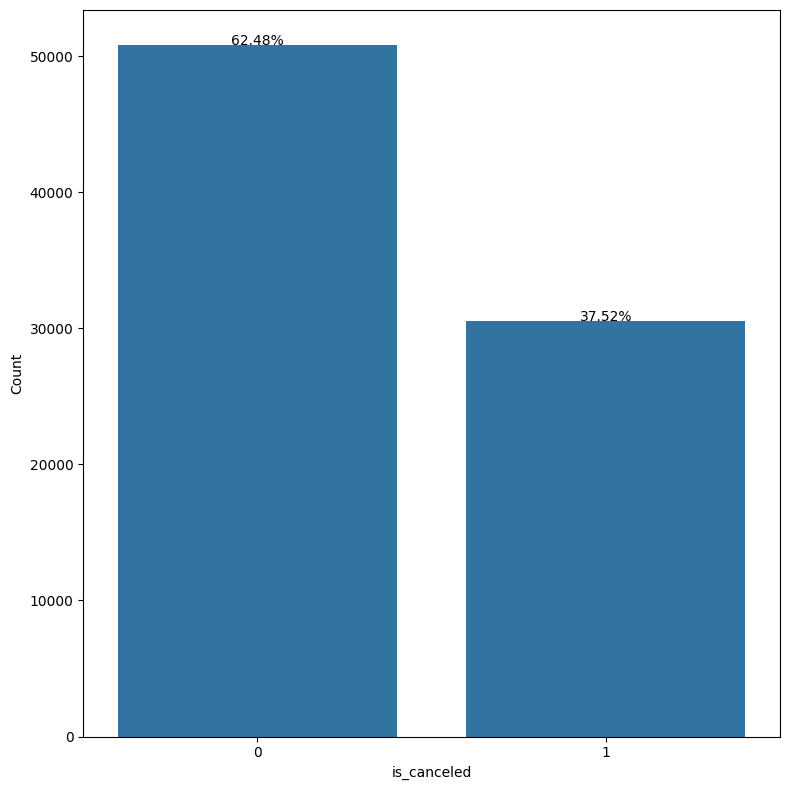

In [17]:
selected_feature = ['is_canceled']

num_cols = 1
num_rows = (len(selected_feature) + num_cols - 1) // num_cols

plt.figure(figsize=(8, 8))

for i, cat in enumerate(selected_feature, 1):
    plt.subplot(num_rows, num_cols, i)
    ax = sns.countplot(x=cat, data=df)
    plt.ylabel("Count")
    plt.xlabel(cat)
    plt.tight_layout()

    # Calculate percentages and add them as text on top of each bar
    total = len(df[cat])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f"{height / total * 100:.2f}%", ha="center")

plt.show()

([<matplotlib.patches.Wedge at 0x7875537f78b0>,
 [Text(-1.016594144022118, -0.420162285718194, 'Confirmed Booking'),
  Text(1.1090117505640162, 0.45835896098029627, 'Canceled Booking')],
 [Text(-0.554505896739337, -0.22917942857356033, '62.5%'),
  Text(0.6469235211623426, 0.26737606057183944, '37.5%')])

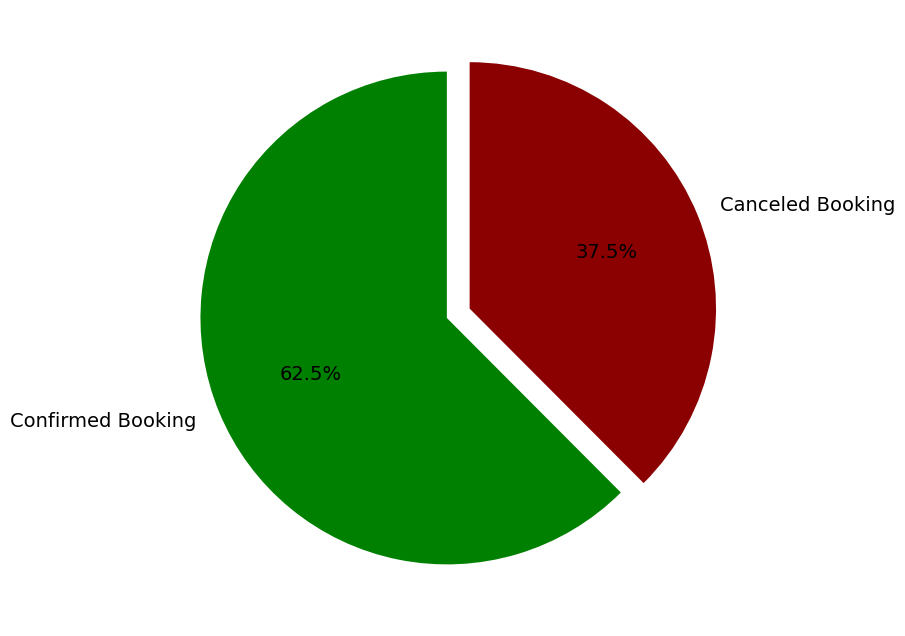

In [19]:
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['is_canceled'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['is_canceled'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['green','darkred']

label_mapping = {0: 'Confirmed Booking', 1: 'Canceled Booking'}
labels = [label_mapping[label] for label in labels]

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors,
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Kolom is_canceled adalah variabel target yang akan diprediksi, dan proporsi pelanggan yang tidak melakukan cancel hampir 2x lebih banyak dari proporsi pelanggan yang melakukan cancel.

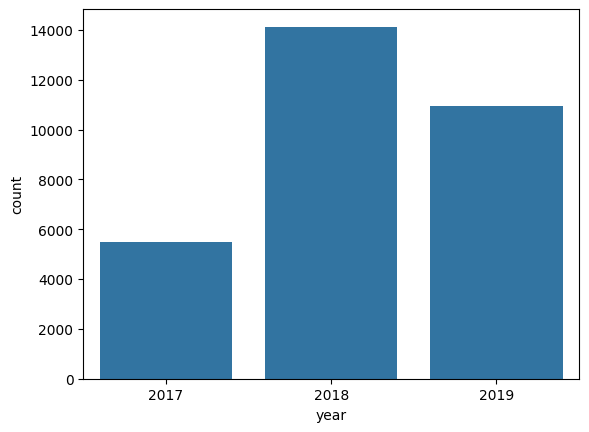

In [ ]:
cancelation_year = df[df['is_canceled'] == 1]['arrival_date_year'].value_counts().reset_index()
cancelation_year.columns = ['year', 'count']

sns.barplot(x = 'year', y = 'count', data= cancelation_year)

plt.show()

In [ ]:
top_country = df[df['is_canceled'] == 0]['country'].value_counts().head(10).reset_index()
top_country.columns = ['country', 'guest number']
top_country

,country,guest number
0,PRT,13775
1,GBR,6622
2,FRA,5862
3,ESP,4311
4,DEU,4225
5,IRL,1735
6,ITA,1673
7,BEL,1311
8,NLD,1186
9,USA,1090


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(top_country, locations = top_country['country'],
                           color = top_country['guest number'], hover_name = top_country['country'])
guests_map.show()

In [ ]:
numerical = []
categorical = []
date = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        numerical.append(i)
    elif (df[i].dtypes == 'object'):
        categorical.append(i)
    else:
        date.append(i)
print(f' numerical data : {numerical}')
print(f' categorical data : {categorical}')
print(f' date form data : {date}')

 numerical data : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'bookingID']
 categorical data : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
 date form data : ['reservation_status_date']


## Statistika Deskriptif

In [ ]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,81389.0,0.375247,0.484190,0.00,0.0,0.0,1.0,1.0
lead_time,81389.0,105.241863,106.964435,0.00,19.0,71.0,162.0,629.0
arrival_date_year,81389.0,2018.161545,0.705924,2017.00,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,81389.0,27.132868,13.578053,1.00,16.0,27.0,38.0,53.0
arrival_date_day_of_month,81389.0,15.786679,8.776522,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,81389.0,0.939783,0.996874,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,81389.0,2.525329,1.896026,0.00,1.0,2.0,3.0,40.0
adults,81389.0,1.863901,0.475288,1.00,2.0,2.0,2.0,4.0
children,81389.0,0.100849,0.390490,0.00,0.0,0.0,0.0,3.0
babies,81389.0,0.007728,0.088825,0.00,0.0,0.0,0.0,2.0


In [ ]:
for col in numerical:
    print(f'Value count column {col}:')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column is_canceled:
--------------------------------------------------
0    50848
1    30541
Name: is_canceled, dtype: int64

Value count column lead_time:
--------------------------------------------------
0      3932
1      2248
2      1346
3      1230
4      1126
       ... 
370       1
463       1
371       1
532       1
424       1
Name: lead_time, Length: 475, dtype: int64

Value count column arrival_date_year:
--------------------------------------------------
2018    38707
2019    27915
2017    14767
Name: arrival_date_year, dtype: int64

Value count column arrival_date_week_number:
--------------------------------------------------
33    2423
30    2087
34    2087
32    2051
18    2022
17    1972
28    1956
21    1924
20    1921
38    1901
29    1880
25    1856
31    1853
41    1851
42    1833
23    1830
15    1823
27    1797
39    1784
35    1772
22    1740
24    1723
19    1656
16    1647
26    1646
40    1634
13    1611
43    1569
14    1552
8     1531
37    152

Text(0.5, 1.0, 'Guest Over Year')

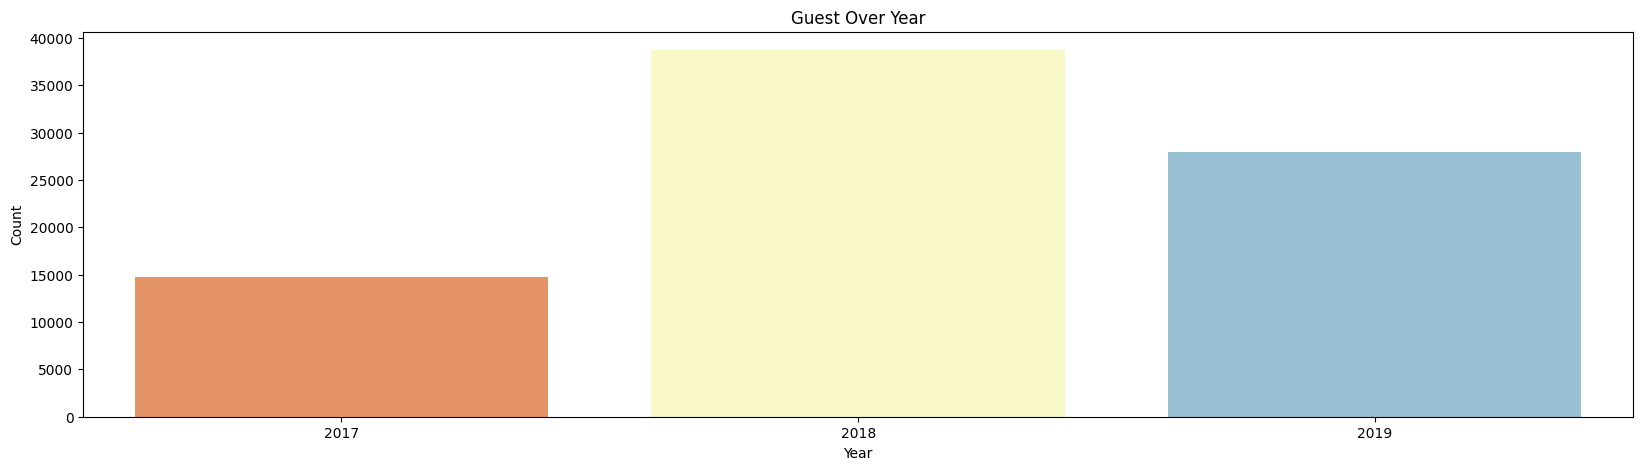

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

# Visualize invoice data
guest_df = df['arrival_date_year'].value_counts()
sns.barplot(x=guest_df.index, y= guest_df.values, ax=ax, palette='RdYlBu')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Guest Over Year')

1. Pengunjung Terbanyak terdapat pada tahun 2018 yaitu sebanyak 39.595 pengunjung.

2. Bookingan untuk menginap pada hari kerja terlama adalah 50 hari.

In [ ]:
df[categorical].describe().T

,count,unique,top,freq
hotel,81389,64,Renaissance New York Times Square Hotel New Yo...,1348
arrival_date_month,81389,12,August,9475
meal,81389,5,BB,62892
country,81389,165,PRT,32810
market_segment,81389,8,Online TA,38976
distribution_channel,81389,5,TA/TO,67427
reserved_room_type,81389,9,A,58770
assigned_room_type,81389,10,A,50963
deposit_type,81389,3,No Deposit,71085
customer_type,81389,4,Transient,61095


In [ ]:
for col in categorical:
    print(f'Value count column {col}:')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column hotel:
--------------------------------------------------
Renaissance New York Times Square Hotel New York, NY                           1348
Las Vegas Marriott Las Vegas, NV                                               1344
Sacramento Airport Natomas Courtyard Sacramento, CA                            1331
Crystal Cove, Barbados Barbados                                                1323
Protea Hotel by Marriott Midrand Midrand, South Africa                         1319
                                                                               ... 
W New York – Union Square New York, NY                                         1223
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1222
W New York – Times Square New York, NY                                         1221
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1220
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1220

Text(0.5, 1.0, 'Top 10 Countries for Non-Canceled Bookings')

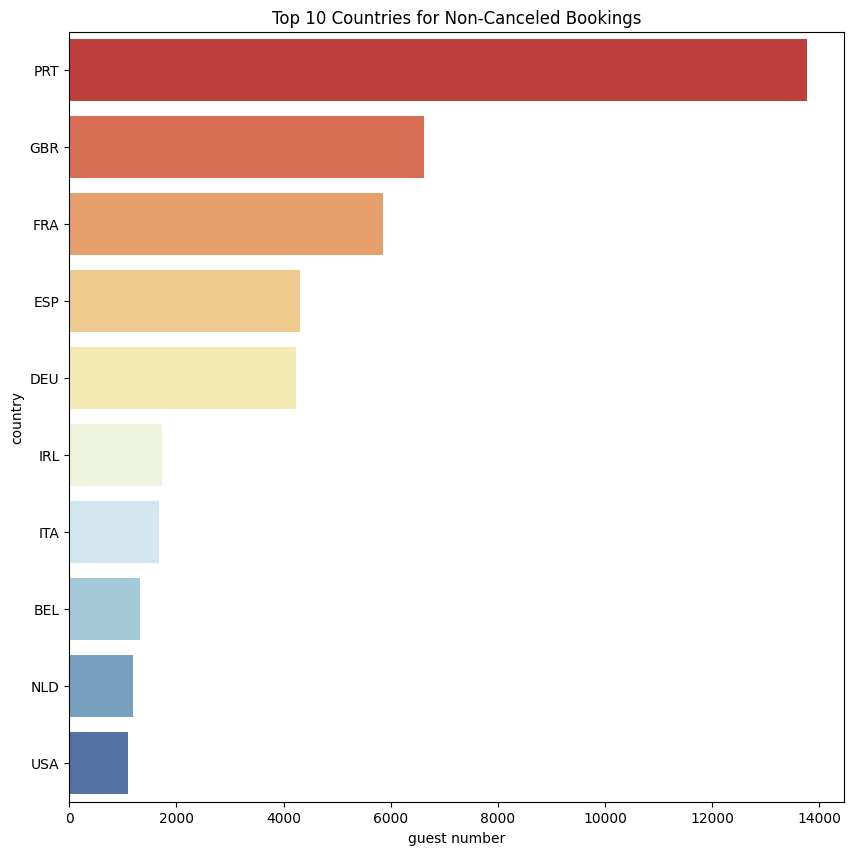

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,10))

#
top_country = df[df['is_canceled'] == 0]['country'].value_counts().head(10).reset_index()
top_country.columns = ['country', 'guest number']
# membuat visualisasi dalam bentuk bar
sns.barplot(x= 'guest number', y= 'country', data = top_country, palette=('RdYlBu'), ax=ax)

ax.set_xlabel('guest number')
ax.set_ylabel('country')
ax.set_title('Top 10 Countries for Non-Canceled Bookings')

Text(0.5, 1.0, 'Top 10 Hotels for Non-Canceled Bookings')

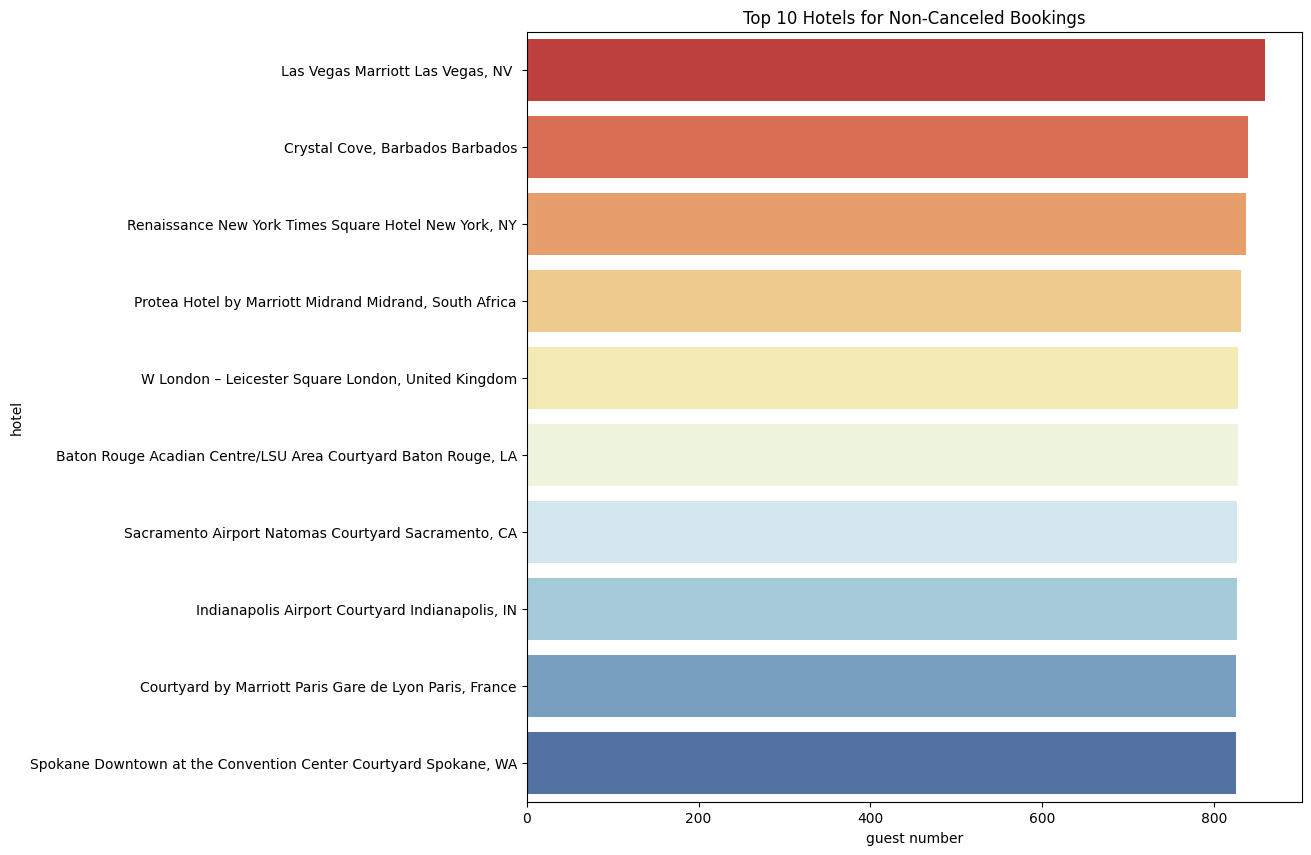

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,10))

#
top_hotel = df[df['is_canceled'] == 0]['hotel'].value_counts().head(10).reset_index()
top_hotel.columns = ['hotel', 'guest number']
# membuat visualisasi dalam bentuk bar
sns.barplot(x= 'guest number', y= 'hotel', data = top_hotel, palette=('RdYlBu'), ax=ax)

ax.set_xlabel('guest number')
ax.set_ylabel('hotel')
ax.set_title('Top 10 Hotels for Non-Canceled Bookings')

In [ ]:
top_hotel = df[df['is_canceled'] == 0]['hotel'].value_counts().head(10).reset_index()
top_hotel.columns = ['hotel', 'guest number']
top_hotel

,hotel,guest number
0,"Las Vegas Marriott Las Vegas, NV",859
1,"Crystal Cove, Barbados Barbados",840
2,Renaissance New York Times Square Hotel New Yo...,837
3,"Protea Hotel by Marriott Midrand Midrand, Sout...",831
4,"W London – Leicester Square London, United Kin...",828
5,Baton Rouge Acadian Centre/LSU Area Courtyard ...,828
6,Sacramento Airport Natomas Courtyard Sacrament...,827
7,"Indianapolis Airport Courtyard Indianapolis, IN",827
8,Courtyard by Marriott Paris Gare de Lyon Paris...,826
9,Spokane Downtown at the Convention Center Cour...,826


1. hotel dengan jumlah booking terbanyak adalah Renaissance New York Times Square Hotel New York, NY, akan tetapi hotel dengan guest terbanyak adalah Las Vegas Marriott Las Vegas, NV
2. Bulan Tersibuk adalah pada bulan agustus, dimana hotel menerima tamu terbanyak di saat liburan musim panas.
3. Akomodasi untuk meal package terpopuler adalah BB/Bed & Breakfast.
4. Pelanggan terbanyak yang melakukan pembookingan berasal dari kalangan pelanggan transient

## Univariate Analysis

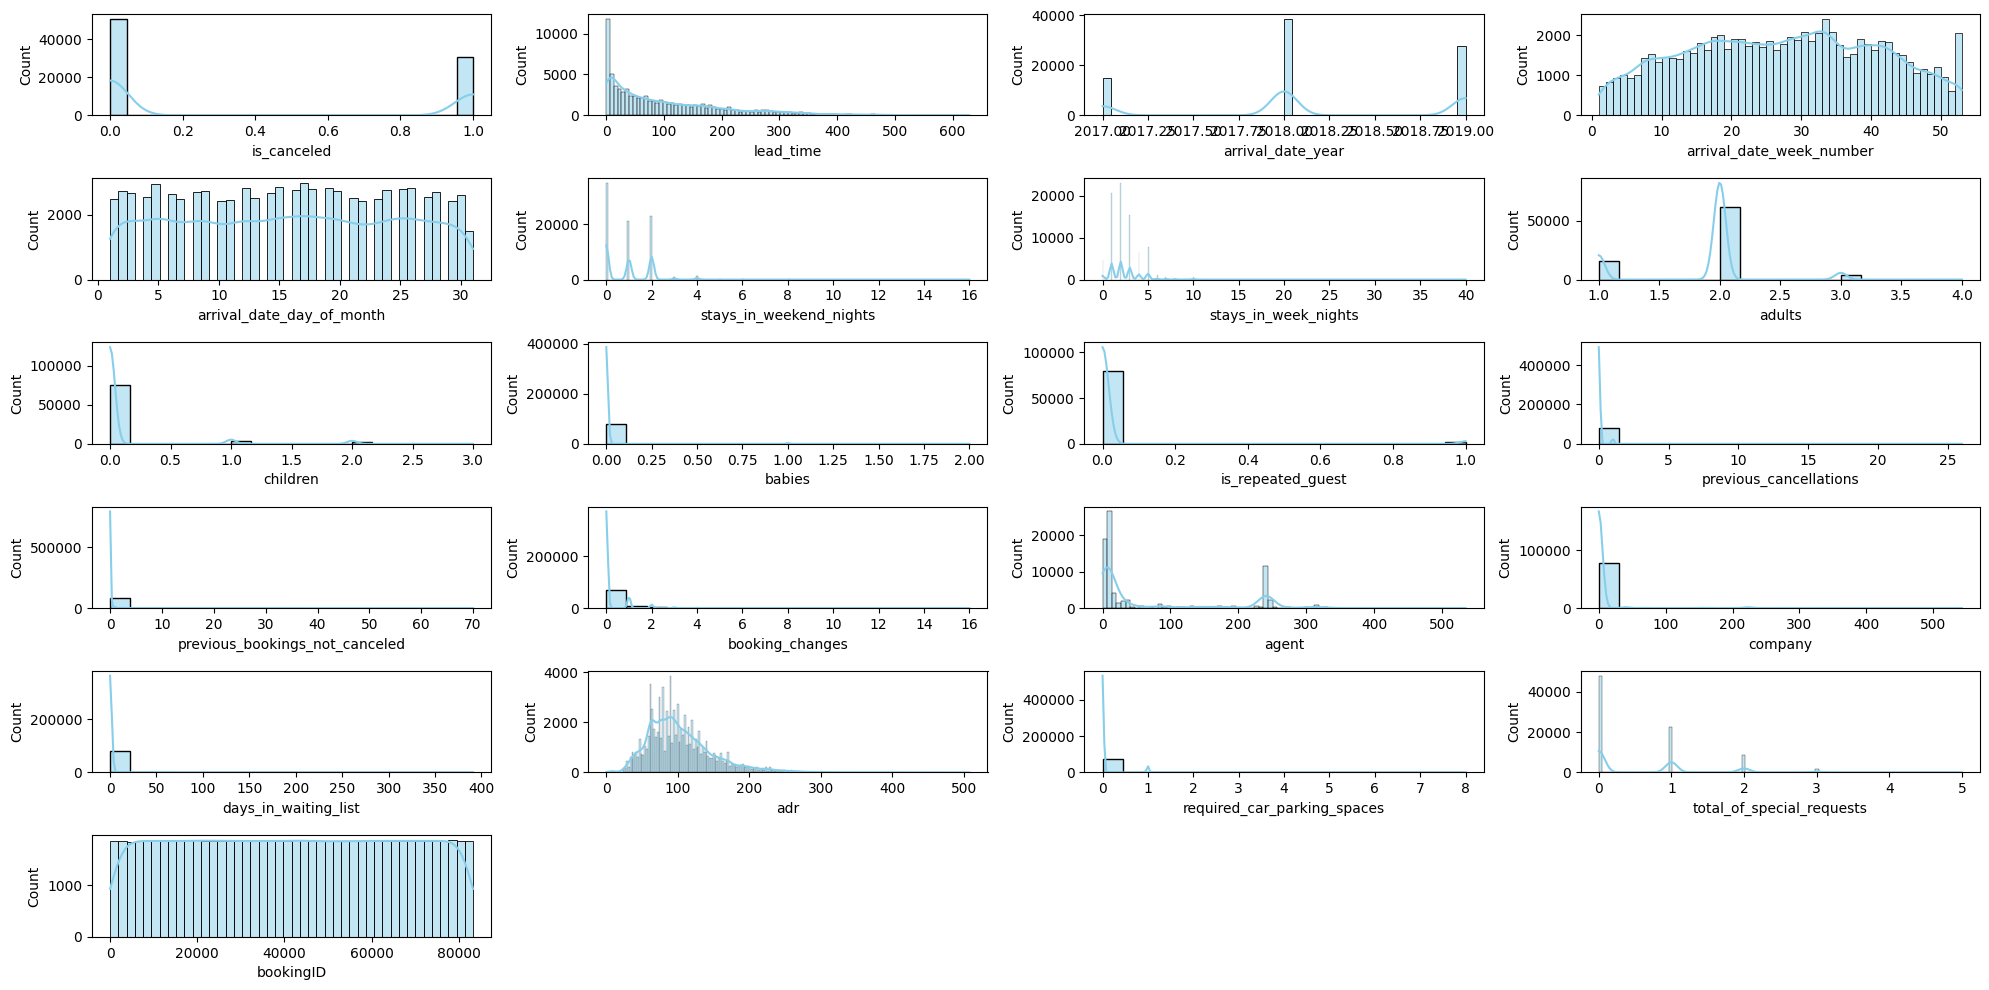

In [ ]:
plt.figure(figsize=(20,10))

features = numerical
for i in range(0, len(features)):
    plt.subplot(6, 4, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

1. Pada umum nya kolom numerik distribusi datanya skew, dan terdapat banyak outlier secara data, yang walaupun outlier nya dianggap wajar dan bukan anomali.

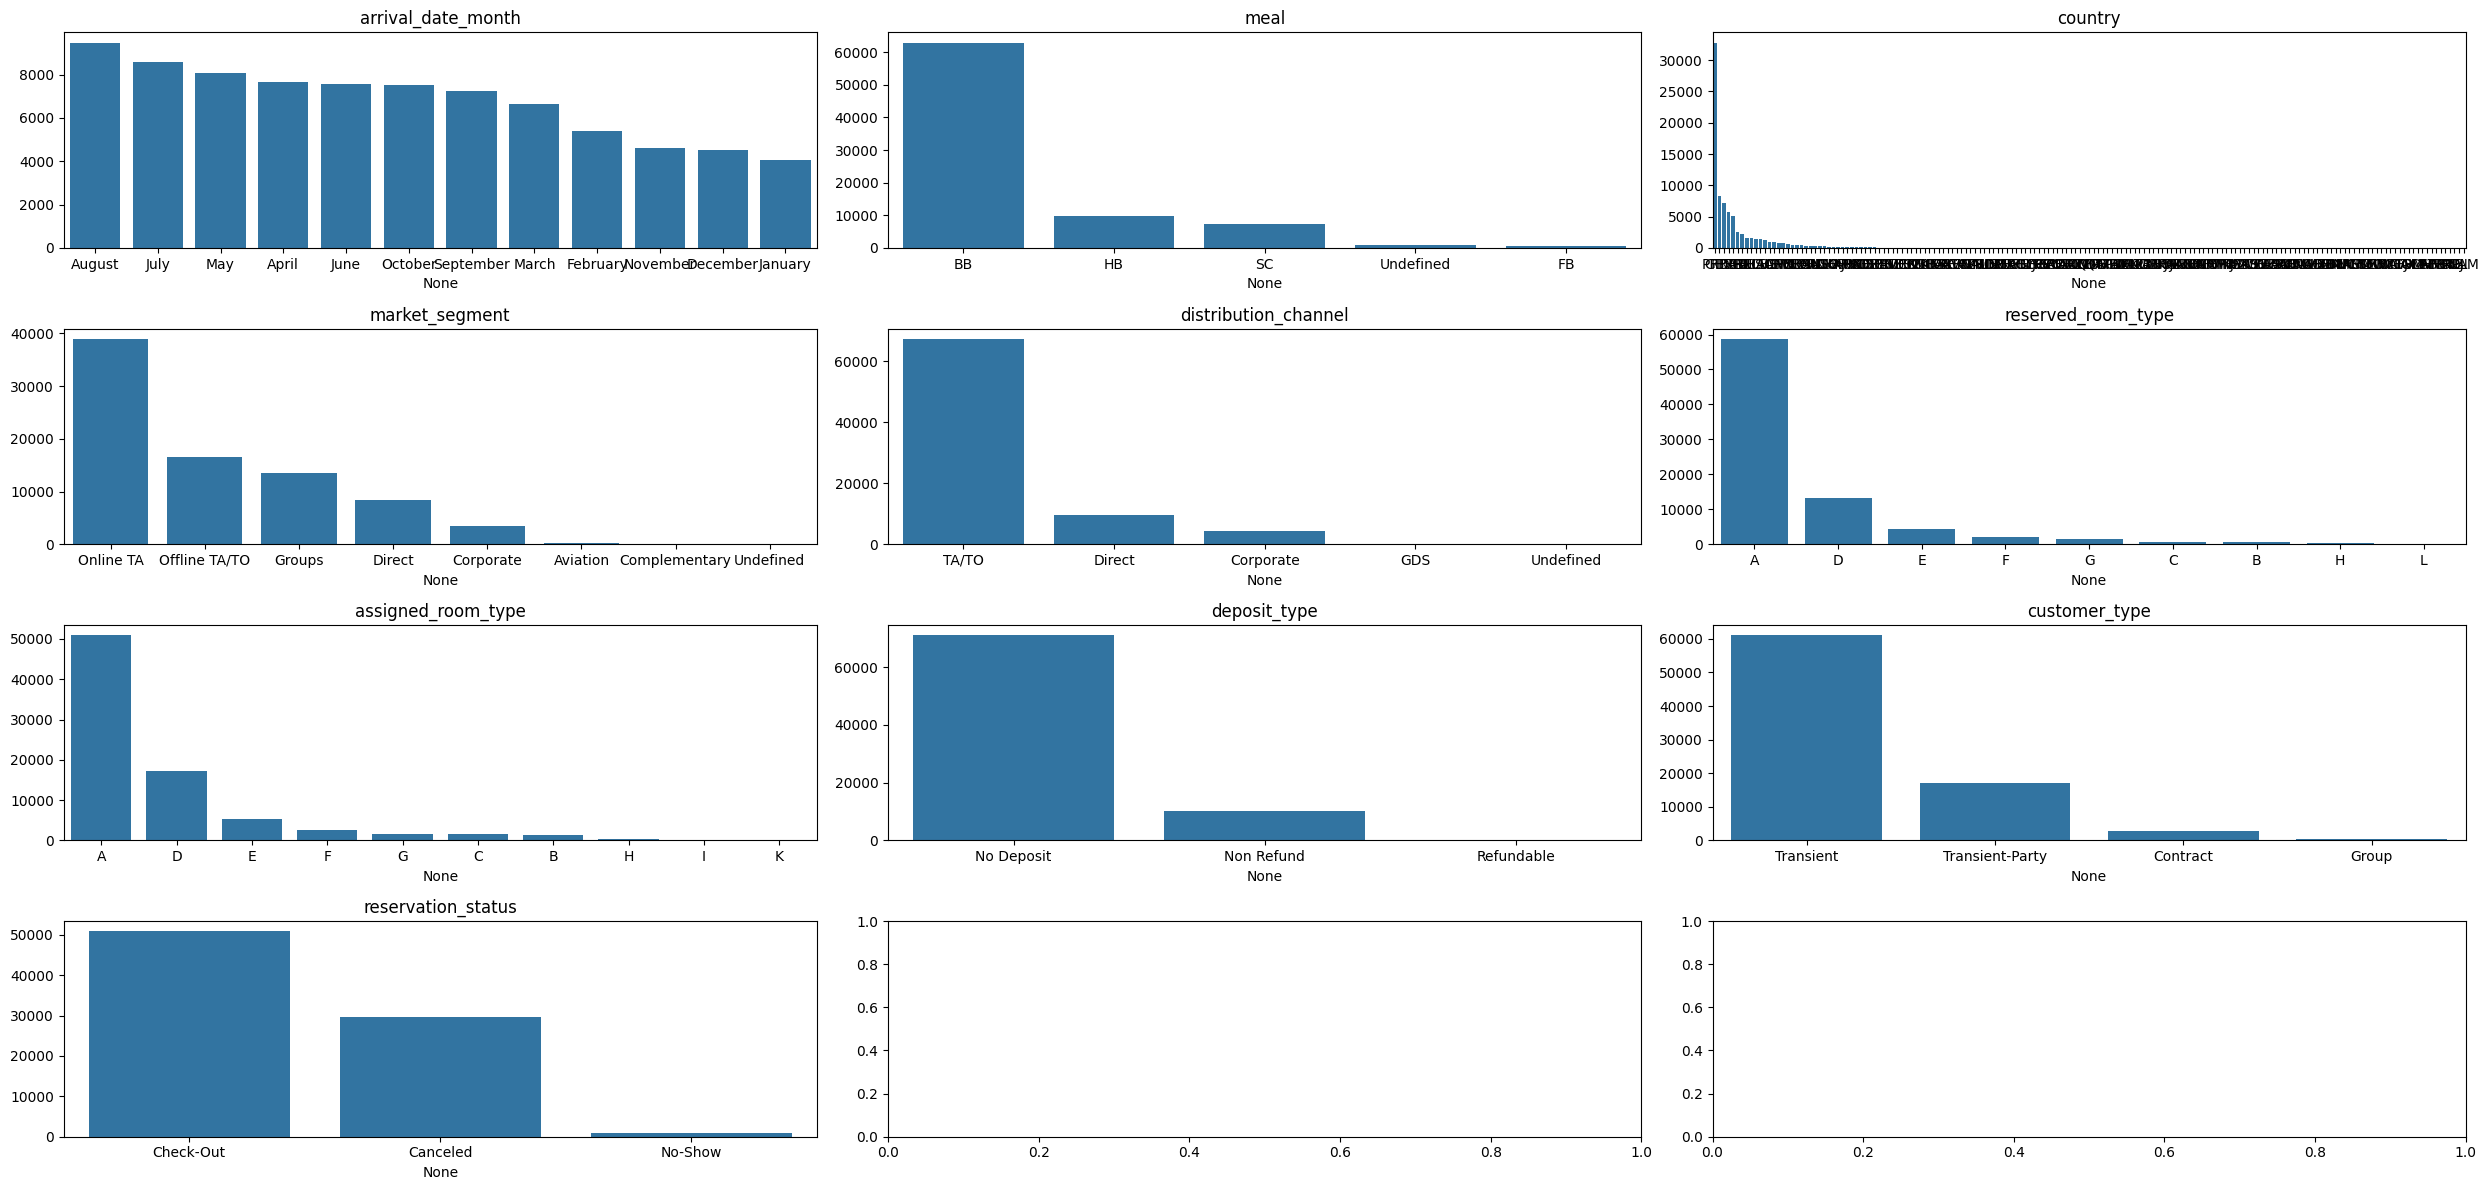

In [ ]:
categories = ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
total_category = len(categories)
row = 4
colom = 3

fig, axes = plt.subplots(row, colom, figsize=(25, 12))
for i, ax in enumerate(axes.flat):
    if i < total_category:
        sns.barplot(x=df[categories[i]].value_counts().index, y=df[categories[i]].value_counts().values, ax=ax)
        ax.set_title(categories[i])

plt.tight_layout()
plt.show()

1. Bulan Tersibuk adalah pada bulan agustus, dimana hotel menerima tamu terbanyak di saat liburan musim panas.
2. Akomodasi untuk meal package terpopuler adalah BB/Bed & Breakfast.
3. Pelanggan terbanyak yang melakukan pembookingan berasal dari kalangan pelanggan transient.
4. Pelanggan Terbanyak berasal dari Portugal
5. Online TA menjadi salah satu platform booking terpopuler di kalangan pembooking(customer) karna flexibilitas dan berbagai kemudahan yang ditawarkan dalam proses pembookingan, walaupun rate pembatalan nya juga termasuk tinggi, berbeda dengan pembookingan dengan groups yang justru mendapat canceled rate yang tinggi dibandingkan yang lainnya.
6. Room type yang paling banyak dipesan oleh pelanggan ada room dengan tipe A.
7. Pelanggan lebih prefer untuk tidak melakukan deposit selama proses pembookingan di bandingkan menggunakan metode deposit yang lainnya.
8. Pelanggan terbanyak berasal dari pelanggan transient, yang merupakan short term guest.

## Multivariate Analysis

In [ ]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plot with percentage labels between two variables
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Calculate churn percentage and reshape the dataframe
    temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)

    # Plot stacked bar chart
    temp_df.plot(kind='bar', stacked=True, ax=ax, color=["green", "darkred"])

    # Add percentage labels on top of each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Is_Canceled Percentage')
    ax.legend(title=target, loc='upper right')

    plt.show()

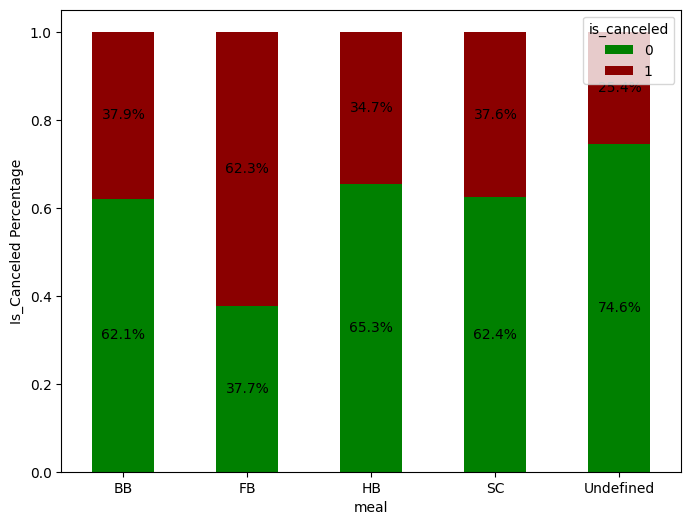

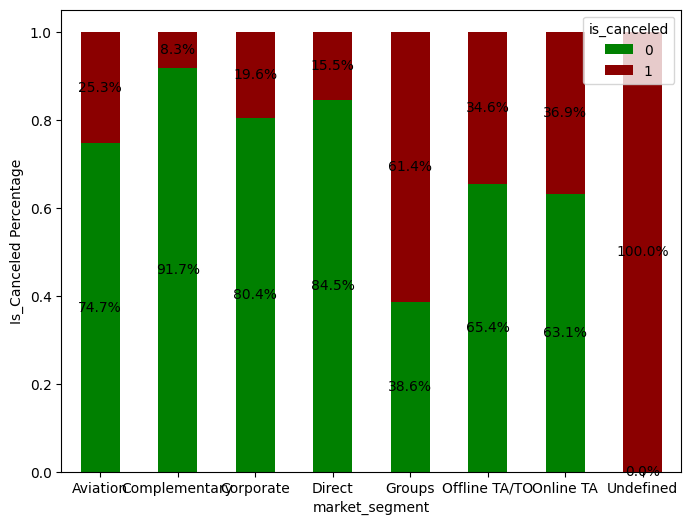

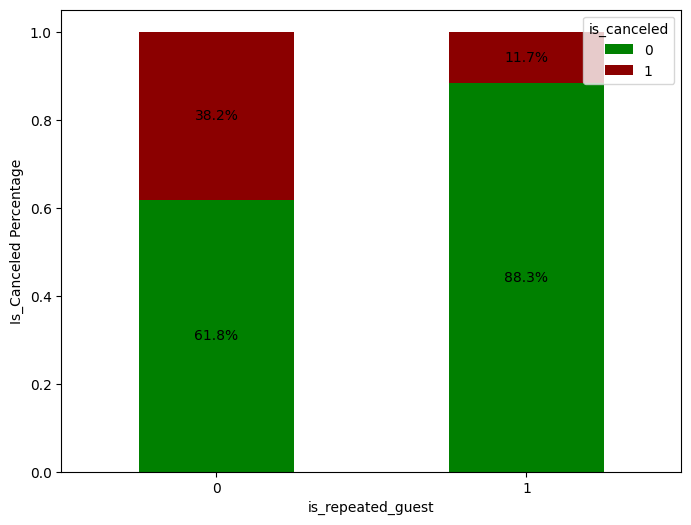

In [ ]:
stacked_plot(df, 'meal', 'is_canceled')
stacked_plot(df, 'market_segment', 'is_canceled')
stacked_plot(df, 'is_repeated_guest', 'is_canceled')

1. Meal dengan pemesanan FB (Full Board) mendapat cancelation rate paling tinggi di antara akomodasi meal yang lain. Sedangkan untuk pemesanan meal yang lain hampir memiliki rate yang sama yaitu +- 60%

2. Pelanggan yang berasal dari market segment group lebih cenderung mempunyai cancelation rate lebih tinggi daripada  pelanggan dari market segment yang lain.

3. Pelanggan yang sudah pernah menginap di hotel, atau kategori bukan pelanggan baru, mempunyai tingkat cancelation yang lebih rendah dibandingkan pelanggan baru


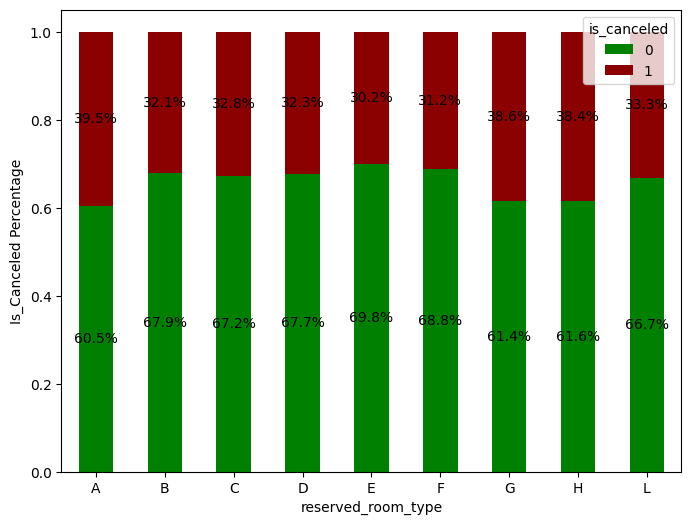

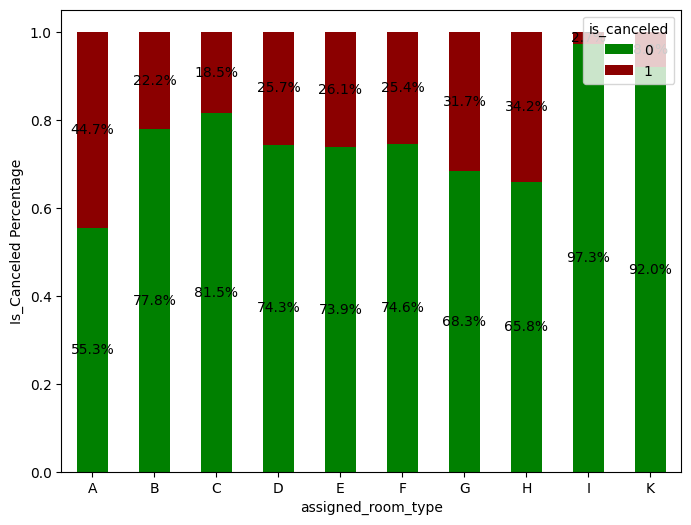

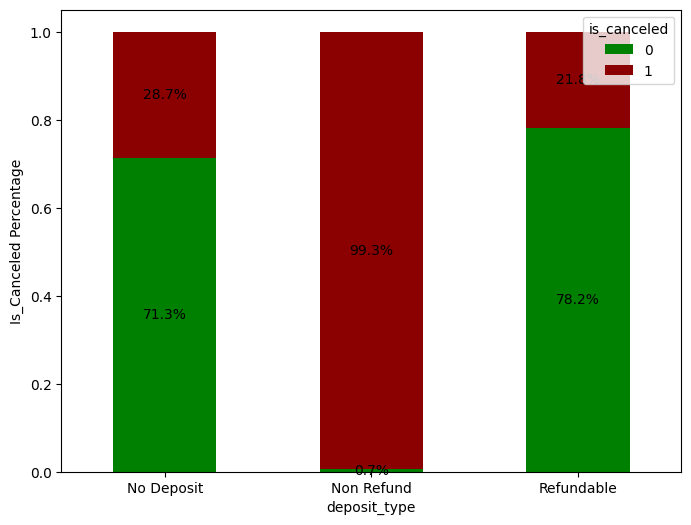

In [ ]:
stacked_plot(df, 'reserved_room_type', 'is_canceled')
stacked_plot(df, 'assigned_room_type', 'is_canceled')
stacked_plot(df, 'deposit_type', 'is_canceled')

1. Pada reversed_room tingkat penerimaan pada setiap ruangan relative sama, akan tetapi, pada kolom assigned_room terjadi pergeseran tingkat cancelation rate, yaitu pada room A cancelation rate meningkat menjadi 44% dan tingkat penerimaan pada room I menjadi 97% dan K adalah 92%, dapat disimpulkan pelanggan merasa puas dan menyukai room I dan K

2. dari deposit type yang disediakan oleh pihak hotel, seperti nya pelanggan tidak menyukai opsi non refund deposit, ini dibuktikan dengan tingkat cancelation nya yang mencapai 99%

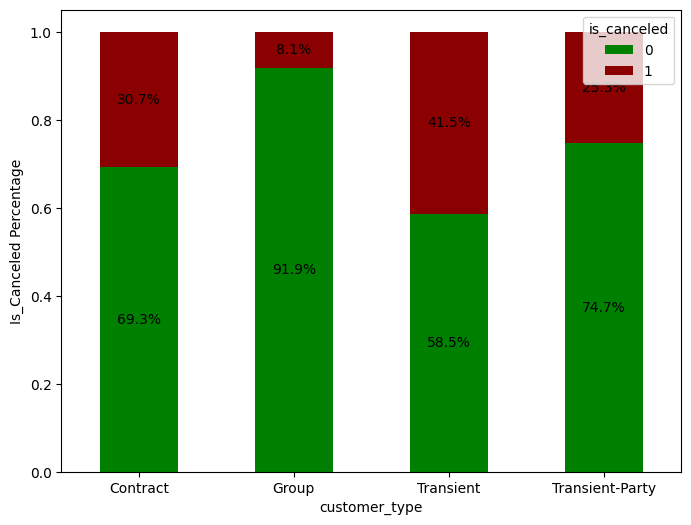

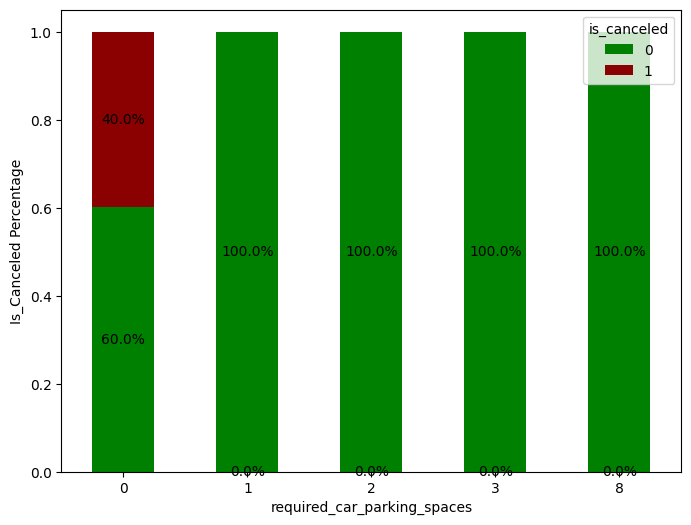

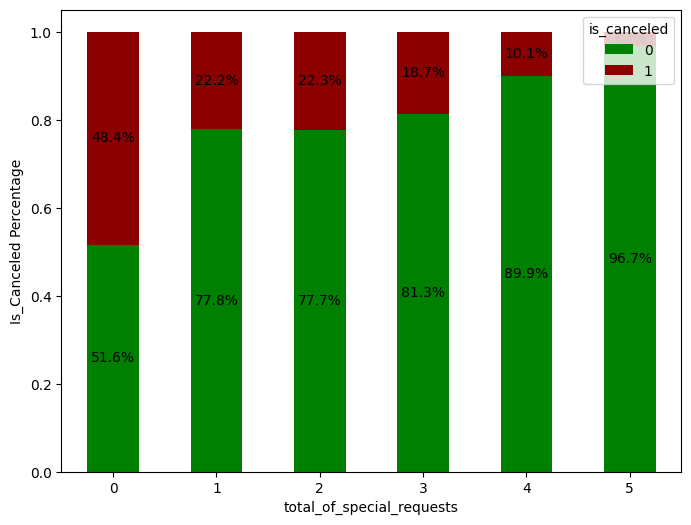

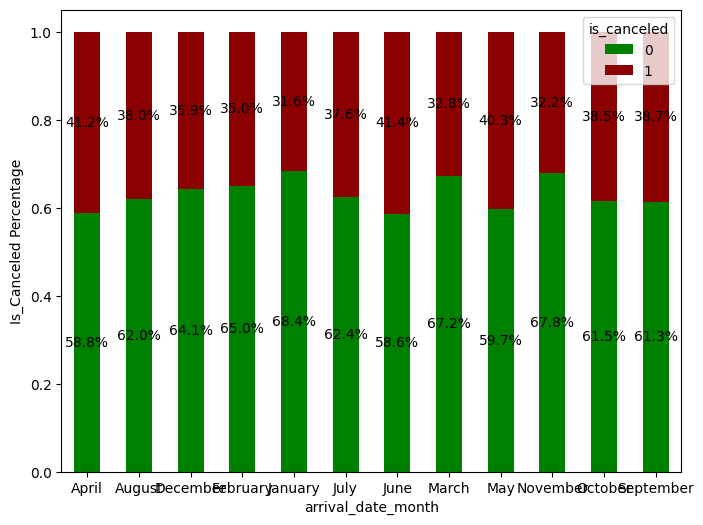

In [ ]:
stacked_plot(df, 'customer_type', 'is_canceled')
stacked_plot(df, 'required_car_parking_spaces', 'is_canceled')
stacked_plot(df, 'total_of_special_requests', 'is_canceled')
stacked_plot(df, 'arrival_date_month', 'is_canceled')

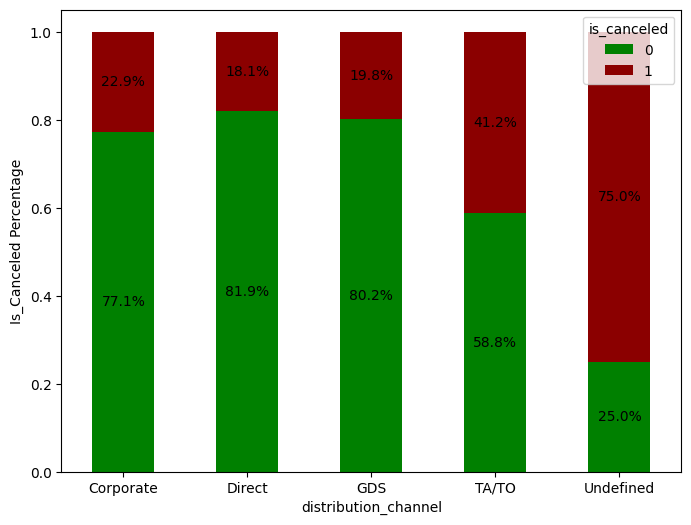

In [ ]:
stacked_plot(df, 'distribution_channel', 'is_canceled')

1. Pelanggan dengan tipe Transient memiliki tingkat cancelation yang ckup tinggi, yaitu 41%

2. pada kolom required_car_parking_spaces dan total special request bisa di golongkan sebagai permintaan khusus dari pelanggan, yang kita bisa lihad, ketika pelanggan mengajukan permintaan khusus itu mempengaruhi cancelation rate mereka, semakin banyak special request mereka yang terpenuhi, maka semakin kecil tingkat cancelation rate mereka.

3. Tidak adanya perbedaan yang signifikan di antara bulan pada kolom arrival_date_month menandakan tidak membutuhkan waktu khusus untuk melakukan pembookingan

In [ ]:
# hubungan lead_time, day in waiting list dan booking changes terhadap cancelation
df.groupby(['is_canceled']).agg({'lead_time' : 'mean', 'booking_changes' : 'mean', 'days_in_waiting_list' : 'mean'})

,lead_time,booking_changes,days_in_waiting_list
is_canceled,,,
0,81.459428,0.287366,1.622070
1,144.837464,0.099997,3.646803


1. Jarak waktu booking yang panjang serta lama nya waktu pada waiting list mempengaruhi tingkat cancelation pelanggan, dapat dilihat dari tabel di atas, semakin tinggi angka atau semakin lama durasi lead time dan days_in_waiting_list membuat pelanggan cenderung akan membatalkan pemesanan/booking hotel mereka.

2. Berbanding terbalik dengan lead time, tingkat booking change yang lbih rendahlah yang sering membatalkan pemesanan mereka, ini dikarenakan adanya kemungkinan perubahan schedule yang secara tiba2 membuat mereka lebih baik mengubah waktu booking nya di bandingkan membatalkan pesanan, dan mungkin saja adanya kebutuhan lain yang membuat mereka memilih utk melakukan booking changes.

In [ ]:
# berapa lama total pengunjung stay di sebuah hotel
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
6,"W New York – Times Square New York, NY",0,205,2019,June,24,13,0,4,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,150.75,0,2,Check-Out,2019-06-17,7
7,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,52,2018,July,29,12,0,2,3,0.0,0,BB,DNK,Online TA,TA/TO,0,0,0,D,E,1,No Deposit,9.0,0.0,0,Transient,137.70,0,1,Check-Out,2018-07-14,8
8,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,44,2017,October,40,3,4,6,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Contract,77.84,0,0,Check-Out,2017-10-13,9
10,"Heidelberg Marriott Hotel Heidelberg, Germany",0,18,2019,July,30,27,0,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,169.00,0,1,Check-Out,2019-07-30,11


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_nights
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4
6,"W New York – Times Square New York, NY",0,205,2019,June,24,13,0,4,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,150.75,0,2,Check-Out,2019-06-17,7,4
7,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,52,2018,July,29,12,0,2,3,0.0,0,BB,DNK,Online TA,TA/TO,0,0,0,D,E,1,No Deposit,9.0,0.0,0,Transient,137.70,0,1,Check-Out,2018-07-14,8,2
8,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,44,2017,October,40,3,4,6,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Contract,77.84,0,0,Check-Out,2017-10-13,9,10
10,"Heidelberg Marriott Hotel Heidelberg, Germany",0,18,2019,July,30,27,0,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,169.00,0,1,Check-Out,2019-07-30,11,3


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index().sort_values('total_nights', ascending= False).head(10)
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
969,56,"San Diego Sorrento Valley Courtyard San Diego, CA",1
968,45,"Treasure Beach, Barbados Barbados",1
967,42,"Des Moines West/Clive Courtyard Clive, IA",1
966,42,Courtyard Las Vegas Convention Center Las Vega...,1
965,38,"Colony Club, Barbados Barbados",1
962,35,Courtyard by Marriott Aberdeen Airport Aberdee...,1
964,35,Protea Hotel Fire & Ice! by Marriott Johannesb...,2
963,35,"Des Moines West/Clive Courtyard Clive, IA",1
961,34,"Heidelberg Marriott Hotel Heidelberg, Germany",1
960,30,Courtyard by Marriott Aberdeen Airport Aberdee...,1


In [ ]:
px.bar(data_frame = stay, x = 'Number of stays', y = 'total_nights', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

1. Hotel dengan pelanggan/tamu terlama menginap adalah hotel Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil, selama 69 hari.

# Data Preprocessing

## Feature Selection

In [ ]:
df1 = df.copy()
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-08-10,6


In [ ]:
df1['total_stays'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_stays
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,4
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-10-21,2,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3,3
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,0.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5,5
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,0.0,0,Transient,62.80,0,0,Canceled,2017-08-10,6,3


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81389 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           81389 non-null  object        
 1   is_canceled                     81389 non-null  int64         
 2   lead_time                       81389 non-null  int64         
 3   arrival_date_year               81389 non-null  int64         
 4   arrival_date_month              81389 non-null  object        
 5   arrival_date_week_number        81389 non-null  int64         
 6   arrival_date_day_of_month       81389 non-null  int64         
 7   stays_in_weekend_nights         81389 non-null  int64         
 8   stays_in_week_nights            81389 non-null  int64         
 9   adults                          81389 non-null  int64         
 10  children                        81389 non-null  float64       
 11  ba

In [ ]:
drop_column = ['reservation_status', 'hotel', 'days_in_waiting_list', 'reservation_status_date',
               'company', 'bookingID', 'agent', 'stays_in_weekend_nights', 'stays_in_week_nights', 'country']
df1.drop(drop_column, axis = 1, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81389 entries, 0 to 83292
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     81389 non-null  int64  
 1   lead_time                       81389 non-null  int64  
 2   arrival_date_year               81389 non-null  int64  
 3   arrival_date_month              81389 non-null  object 
 4   arrival_date_week_number        81389 non-null  int64  
 5   arrival_date_day_of_month       81389 non-null  int64  
 6   adults                          81389 non-null  int64  
 7   children                        81389 non-null  float64
 8   babies                          81389 non-null  int64  
 9   meal                            81389 non-null  object 
 10  market_segment                  81389 non-null  object 
 11  distribution_channel            81389 non-null  object 
 12  is_repeated_guest               

In [ ]:
num_df = []
cat_df = []
date_df = []
for i in df1.columns:
    if (df1[i].dtypes == 'float64') or (df1[i].dtypes == 'int64'):
        num_df.append(i)
    elif (df1[i].dtypes == 'object'):
        cat_df.append(i)
    else:
        date_df.append(i)
print(f' numerical data : {num_df}')
print(f' categorical data : {cat_df}')
print(f' date form data : {date_df}')

 numerical data : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stays']
 categorical data : ['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
 date form data : []


In [ ]:
for i in cat_df:
    df1 = pd.get_dummies(df1, columns=[i], drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81389 entries, 0 to 83292
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     81389 non-null  int64  
 1   lead_time                       81389 non-null  int64  
 2   arrival_date_year               81389 non-null  int64  
 3   arrival_date_week_number        81389 non-null  int64  
 4   arrival_date_day_of_month       81389 non-null  int64  
 5   adults                          81389 non-null  int64  
 6   children                        81389 non-null  float64
 7   babies                          81389 non-null  int64  
 8   is_repeated_guest               81389 non-null  int64  
 9   previous_cancellations          81389 non-null  int64  
 10  previous_bookings_not_canceled  81389 non-null  int64  
 11  booking_changes                 81389 non-null  int64  
 12  adr                             

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[num_df] = scaler.fit_transform(df1[num_df])

In [ ]:
df1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_stays,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,0.012719,1.0,0.019231,0.300000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.075117,0.0,0.0,0.054545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,0.833068,0.5,0.961538,0.466667,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.123173,0.0,0.0,0.018182,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1.0,0.278219,1.0,0.365385,0.600000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.216134,0.0,0.0,0.036364,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,0.052464,0.0,0.730769,0.833333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.113562,0.0,0.2,0.072727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1.0,0.627981,0.5,0.230769,0.666667,0.333333,0.0,0.0,0.0,0.038462,0.0,0.0,0.123173,0.0,0.0,0.036364,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Modeling

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81389 entries, 0 to 83292
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     81389 non-null  float64
 1   lead_time                       81389 non-null  float64
 2   arrival_date_year               81389 non-null  float64
 3   arrival_date_week_number        81389 non-null  float64
 4   arrival_date_day_of_month       81389 non-null  float64
 5   adults                          81389 non-null  float64
 6   children                        81389 non-null  float64
 7   babies                          81389 non-null  float64
 8   is_repeated_guest               81389 non-null  float64
 9   previous_cancellations          81389 non-null  float64
 10  previous_bookings_not_canceled  81389 non-null  float64
 11  booking_changes                 81389 non-null  float64
 12  adr                             

In [ ]:
X = df1.drop(columns='is_canceled', axis=1)
y = df1['is_canceled']
X.shape, y.shape

((81389, 63), (81389,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((52088, 63), (13023, 63), (16278, 63), (52088,), (13023,), (16278,))

In [ ]:
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
import time

def create_models(models, X_train, X_test, y_train, y_test, cv=5):
    get_model, f1_scores, recall_scores, auc_scores, times = [], [], [], [], []
    for name, model in models.items():
        print(f"Evaluasi Model: {name}")

        # Cross-validation
        cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=['recall', 'f1', 'roc_auc'], n_jobs=-1)

        # Extract mean scores
        recall_mean = np.mean(cv_results['test_recall'])
        f1_mean = np.mean(cv_results['test_f1'])
        auc_mean = np.mean(cv_results['test_roc_auc'])

        # Print cross-validation results
        print("Cross-Validation Results:")
        print(f"- Recall    : {recall_mean}")
        print(f"- F1-Score  : {f1_mean}")
        print(f"- AUC       : {auc_mean}")

        start = time.process_time()
        if name == "XGBoost":
            X_train_np = X_train.to_numpy()
            y_train_np = y_train.to_numpy()
            clf = model.fit(X_train_np, y_train_np)
            y_prob = clf.predict_proba(X_test)[:, 1]
            y_pred = clf.predict(X_test) ; y_pred_train = clf.predict(X_train_np)
        else:
            clf = model.fit(X_train, y_train)
            y_prob = clf.predict_proba(X_test)[:, 1]
            y_pred = clf.predict(X_test) ; y_pred_train = clf.predict(X_train)
        exectime = round(time.process_time() - start, 4)

        recall_model_result = round(recall_score(y_test, y_pred), 4)
        f1 = round(f1_score(y_test, y_pred), 4)
        auc = round(roc_auc_score(y_test, y_prob), 4);
        matriks = confusion_matrix(y_test,y_pred)

        print("Test Set Results:")
        print(f"- Recall    : {recall_model_result}")
        print(f"- F1-Score  : {f1}")
        print(f"- AUC       : {auc}")
        print("Confusion Matrix:")
        print(matriks)
        print(f"- Time      : {exectime} seconds")
        print("===================================================================================")

        #Append values to list
        f1_scores.append(f1); auc_scores.append(auc) ; times.append(exectime)
        get_model.append(clf); recall_scores.append(recall_model_result)
    return get_model, f1_scores, recall_scores, auc_scores, times

def evaluate(models, f1_scores, recall_scores, auc_scores, times):
    table = pd.DataFrame({
        "Model": models.keys(),
        "AUC Score": auc_scores,
        "F1-Score": f1_scores,
        "Recall": recall_scores,
        "Time": times
    })
    result = table.set_index('Model').sort_values(by="Recall", ascending=False).reset_index()
    return result

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

models = {'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'XGBoost': XGBClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42),
          'LightGBM': LGBMClassifier(random_state=42)}

In [ ]:
get_model, f1_scores, recall_scores, auc_scores, times = create_models(models, X_train, X_test, y_train, y_test)
result1 = evaluate(models, f1_scores, recall_scores, auc_scores, times)
result1

Evaluasi Model: Decision Tree
Cross-Validation Results:
- Recall    : 0.743579744657947
- F1-Score  : 0.7380130313106844
- AUC       : 0.79204061507718
Test Set Results:
- Recall    : 0.743
- F1-Score  : 0.7389
- AUC       : 0.796
Confusion Matrix:
[[8623 1619]
 [1551 4485]]
- Time      : 0.664 seconds
Evaluasi Model: Random Forest
Cross-Validation Results:
- Recall    : 0.7348849326886249
- F1-Score  : 0.7888663710804418
- AUC       : 0.9176635112531354
Test Set Results:
- Recall    : 0.7328
- F1-Score  : 0.7869
- AUC       : 0.9195
Confusion Matrix:
[[9460  782]
 [1613 4423]]
- Time      : 12.4962 seconds
Evaluasi Model: XGBoost
Cross-Validation Results:
- Recall    : 0.7063608011725637
- F1-Score  : 0.7682601929831369
- AUC       : 0.9104789801798766
Test Set Results:
- Recall    : 0.7056
- F1-Score  : 0.7673
- AUC       : 0.9128
Confusion Matrix:
[[9436  806]
 [1777 4259]]
- Time      : 3.7154 seconds
Evaluasi Model: Gradient Boosting
Cross-Validation Results:
- Recall    : 0.61890

,Model,AUC Score,F1-Score,Recall,Time
0,Decision Tree,0.7960,0.7389,0.7430,0.6640
1,Random Forest,0.9195,0.7869,0.7328,12.4962
2,XGBoost,0.9128,0.7673,0.7056,3.7154
3,LightGBM,0.9073,0.7565,0.6783,1.4997
4,Gradient Boosting,0.8847,0.7141,0.6146,11.8249


# Hyperparameter Tuning

## XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': np.arange(0.01, 0.31, 0.01),
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': np.arange(3, 8),
    'subsample': np.arange(0.8, 1.1, 0.1),
    'colsample_bytree': np.arange(0.8, 1.1, 0.1),
    'gamma': np.arange(0, 0.5, 0.1),
    'min_child_weight': np.arange(1, 5),
    'scale_pos_weight': np.arange(1, 4),
}
xgb_model = XGBClassifier()
xgb_cv = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist,
    cv=3, scoring='f1', n_jobs=-1, n_iter=200,
    return_train_score=True, verbose=2
)
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
xgb_cv.fit(X_train_np, y_train_np)
print("Best parameters (XGB): {}".format(xgb_cv.best_params_))

## Random Forest

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 401, 10),
    'max_depth': [None] + list(np.arange(10, 31, 1)),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['sqrt', 'log2', None] + list(np.arange(0.1, 1.1, 0.1)),
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'],
    'random_state': [42],
}
rf_model = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist,
    cv=3, scoring='recall', n_jobs=-1, n_iter=75,
    return_train_score=True, verbose=2
)
rf_cv.fit(X_train, y_train)
print("Best parameters (RF): {}".format(rf_cv.best_params_))

## LightGBM

In [ ]:
from scipy.stats import randint
param_dist = {
    'num_leaves': randint(10, 100),
    'learning_rate': np.arange(0.01, 0.31, 0.01),
    'n_estimators': np.arange(50, 501, 50),
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
}
lgb = LGBMClassifier(random_state=42)
lgb_cv = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_dist,
    cv=3, scoring='f1', n_jobs=-1, n_iter=300,
    return_train_score=True, verbose=2
)
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
lgb_cv.fit(X_train_np, y_train_np)
print("Best parameters (LightGBM): {}".format(lgb_cv.best_params_))

## DecisionTree

In [ ]:
param_dist = {
    'max_depth': np.arange(3, 8),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2, 11, 1),
    'max_leaf_nodes' : (2,3,4,5,6),
    'random_state': [42],
    'class_weight': ['balanced']
}
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv = RandomizedSearchCV(
    estimator=dt_model, param_distributions=param_dist,
    cv=3, scoring='recall', n_jobs=-1, n_iter=75,
    return_train_score=True, verbose=2
)
dt_cv.fit(X_train, y_train)
print("Best parameters (DT): {}".format(dt_cv.best_params_))

In [ ]:
models = {'Random Forest_Tuned': RandomForestClassifier(criterion='entropy',
                                                        max_depth=15,
                                                        max_features=1.0,
                                                        n_estimators=270,
                                                        random_state=42,
                                                        min_samples_split=4,
                                                        min_samples_leaf=1,
                                                        class_weight='balanced'),
          'XGBoost_Tuned': XGBClassifier(subsample=0.9,
                                         scale_pos_weight=2,
                                         n_estimators=450,
                                         min_child_weight=1,
                                         max_depth=6,
                                         learning_rate=0.21000000000000002,
                                         gamma=0.30000000000000004,
                                         colsample_bytree=0.9),
          'LightGBM_Tuned': LGBMClassifier(colsample_bytree=0.5,
                                           learning_rate=0.08,
                                           n_estimators=500,
                                           num_leaves=97,
                                           subsample=0.9),
          'DecisionTree_Tuned' : DecisionTreeClassifier(random_state = 42,
                                                        min_samples_split = 8,
                                                        max_leaf_nodes = 5,
                                                        max_depth = 7,
                                                        criterion = 'gini',
                                                        class_weight = 'balanced')
}

In [ ]:
get_model, f1_scores, recall_scores, auc_scores, times = create_models(models, X_train, X_test, y_train, y_test)
result2 = evaluate(models, f1_scores, recall_scores, auc_scores, times)
result2

Evaluasi Model: Random Forest_Tuned
Cross-Validation Results:
- Recall    : 0.7595972369419604
- F1-Score  : 0.7727259812661025
- AUC       : 0.9066099929760416
Test Set Results:
- Recall    : 0.7589
- F1-Score  : 0.769
- AUC       : 0.9078
Confusion Matrix:
[[8945 1297]
 [1455 4581]]
- Time      : 94.3377 seconds
Evaluasi Model: XGBoost_Tuned
Cross-Validation Results:
- Recall    : 0.8154776285186637
- F1-Score  : 0.7899548065924774
- AUC       : 0.9156336663697877
Test Set Results:
- Recall    : 0.8229
- F1-Score  : 0.796
- AUC       : 0.9207
Confusion Matrix:
[[8765 1477]
 [1069 4967]]
- Time      : 12.2177 seconds
Evaluasi Model: LightGBM_Tuned
Cross-Validation Results:
- Recall    : 0.741953056864659
- F1-Score  : 0.7896164859420892
- AUC       : 0.9200932923185464
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19667, number of negative: 32421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

,Model,AUC Score,F1-Score,Recall,Time
0,XGBoost_Tuned,0.9207,0.7960,0.8229,12.2177
1,Random Forest_Tuned,0.9078,0.7690,0.7589,94.3377
2,LightGBM_Tuned,0.9233,0.7917,0.7439,9.6180
3,DecisionTree_Tuned,0.8044,0.6667,0.5722,0.1887


In [ ]:
result = pd.concat([result1, result2], axis=0)
result.set_index('Model').sort_values(by='Recall',ascending=False).reset_index()

,Model,AUC Score,F1-Score,Recall,Time
0,XGBoost_Tuned,0.9207,0.7960,0.8229,12.2177
1,Random Forest_Tuned,0.9078,0.7690,0.7589,94.3377
2,LightGBM_Tuned,0.9233,0.7917,0.7439,9.6180
3,Decision Tree,0.7960,0.7389,0.7430,0.6640
4,Random Forest,0.9195,0.7869,0.7328,12.4962
5,XGBoost,0.9128,0.7673,0.7056,3.7154
6,LightGBM,0.9073,0.7565,0.6783,1.4997
7,Gradient Boosting,0.8847,0.7141,0.6146,11.8249
8,DecisionTree_Tuned,0.8044,0.6667,0.5722,0.1887


# Feature Importance

In [ ]:
!pip install shap

In [ ]:
models

{'Random Forest_Tuned': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=15, max_features=1.0, min_samples_split=4,
                        n_estimators=270, random_state=42),
 'XGBoost_Tuned': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.9, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.30000000000000004, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.21000000000000002,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=450, n_jobs=None,
               num_parall

In [ ]:
model = models['XGBoost_Tuned']
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=5,
                       min_samples_split=8, random_state=42)

In [ ]:
import shap

model = models['XGBoost_Tuned']

In [ ]:
shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(X_test)

print(shap_values.shape)

(16278, 63)


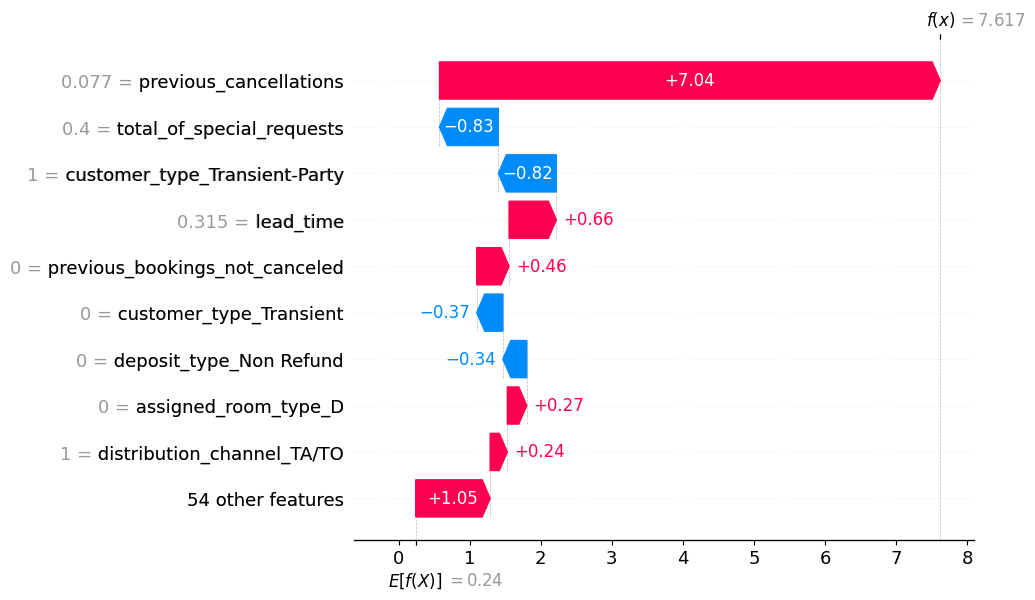

In [ ]:
# waterfall plot for first instance
shap.plots.waterfall(shap_values[0])

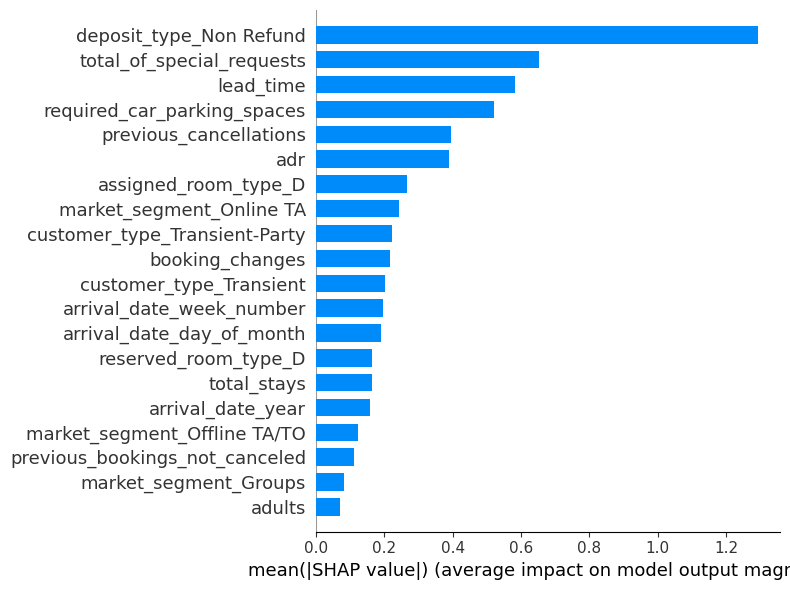

In [ ]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(8, 6))